In [11]:
import requests
import json

import pandas as pd
#Print all columns and all rows in a panda dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.cloud import language_v1 as language

In [12]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




In [53]:
english_query = """
+(categories:adHocRelease categories:event1 categories:mediaRelease categories:news categories:research)
+C03NEws.publishDate:[20150101000000 to 20211231235959]
+languageId:1
+deleted:false
"""

deutsche_query = """
+(categories:adHocRelease categories:event1 categories:mediaRelease categories:news categories:research)
+C03NEws.publishDate:[20150101000000 to 20211231235959]
+languageId:3
+deleted:false
"""

english_request = requests.get(f"https://db.com/api/content/limit/100/offset/0/render/false/type/json/query/{english_query}")
english_contents = {c['identifier']:c for c in english_request.json()['contentlets']}

deutsche_request = requests.get(f"https://db.com/api/content/limit/100/offset/0/render/false/type/json/query/{deutsche_query}")
deutsche_contents = {c['identifier']:c for c in deutsche_request.json()['contentlets']}

In [54]:
en_df = pd.DataFrame.from_dict(english_contents, orient='index')
en_df.head(1)

,hostName,modDate,publishDate,title,baseType,inode,archived,host,layoutType,working,locked,stInode,contentType,headline,live,owner,identifier,usefulLinks,urlTitle,languageId,URL_MAP_FOR_CONTENT,richText,url,titleImage,modUserName,urlMap,folder,hasTitleImage,sortOrder,modUser,subHeadline,imageSmall,secondReadingBox,imageLarge,teaserText,contactPerson,redirectUrl,excerpt,newsTags,expiryDate,location
e78b1426-e48e-48f7-8ec7-270236710883,www.db.com,2021-03-25 16:58:16.71,2019-02-11 04:02:00.0,Deutsche Bank presents the smallest and most e...,CONTENT,a500bc5a-69d0-4f96-a9c1-55a767264b16,False,8e29bc28-e0f6-40f1-930a-6258631a0985,1,True,False,71b4a34b-8593-4167-9135-06f2f0b39687,C03news,Deutsche Bank presents the smallest and most e...,True,dotcms.org.4139,e78b1426-e48e-48f7-8ec7-270236710883,"<p><a href=""/news/detail/20180503-deutsche-ban...",20190211-deutsche-bank-presents-the-smallest-a...,1,/news/detail/20190211-deutsche-bank-presents-t...,<div>\n<div><span> </span>\n<p>Deutsche Bank i...,/content.6369f25f-a561-4d46-88d1-f4c6b66428f3,TITLE_IMAGE_NOT_FOUND,Jacques Regnier,/news/detail/20190211-deutsche-bank-presents-t...,SYSTEM_FOLDER,False,0,dotcms.org.3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
de_df = pd.DataFrame.from_dict(deutsche_contents, orient='index')
de_df.head(1)

,hostName,modDate,publishDate,title,baseType,inode,archived,host,layoutType,working,locked,stInode,contentType,headline,live,owner,identifier,usefulLinks,urlTitle,languageId,URL_MAP_FOR_CONTENT,richText,url,titleImage,modUserName,urlMap,folder,hasTitleImage,sortOrder,modUser,subHeadline,imageSmall,location,teaserText,contactPerson,redirectUrl
cf2d1e51-1cba-44d9-a18d-3f6ed8cf4e73,www.db.com,2021-03-25 16:59:38.257,2017-07-02 12:46:00.0,Wie wird die Zukunft der Demokratie aussehen?,CONTENT,dba77993-3917-4675-8d09-a4e45c53b706,False,8e29bc28-e0f6-40f1-930a-6258631a0985,1,True,False,71b4a34b-8593-4167-9135-06f2f0b39687,C03news,Wie wird die Zukunft der Demokratie aussehen?,True,dotcms.org.4139,cf2d1e51-1cba-44d9-a18d-3f6ed8cf4e73,"<p><a href=""http://www.tedxberlin.de/events"">T...",20170702-wie-wird-die-zukunft-der-demokratie-a...,3,/news/detail/20170702-wie-wird-die-zukunft-der...,<div>\n<div><span> </span>\n<p>Die meisten Sta...,/content.fe3de0c2-8f01-4aa6-abc9-7236fd497037,TITLE_IMAGE_NOT_FOUND,Jacques Regnier,/news/detail/20170702-wie-wird-die-zukunft-der...,SYSTEM_FOLDER,False,0,dotcms.org.3032,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
combined_df = en_df.join(de_df, how='inner', lsuffix='_en', rsuffix='_de')[['publishDate_en', 'title_en', 'title_de']]

In [110]:
combined_df.head()

,publishDate_en,title_en,title_de
8213681f-149c-436b-bd00-be56f2b90142,2015-01-19 11:35:00.0,Deutsche Bank recognised as leader in corporat...,Studie zeigt Deutsche Bank als führend bei Kom...
4f73a018-5ee0-435f-b7e0-21ac4a9be40d,2017-05-23 05:27:00.0,Deutsche Bank signs Accreditation Master Agree...,Deutsche Bank unterzeichnet Rahmenvereinbarung...
409c6a19-8a8e-495a-8f7d-51a6e5183d79,2018-07-11 03:14:00.0,Made for Good: making a positive impact and cr...,Gutes gründen - Perspektiven eröffnen
e651961f-5d8c-4be6-a1e9-24a7b482bb05,2016-04-28 10:22:00.0,Georg F. Thoma to leave the Supervisory Board ...,Georg F. Thoma verlässt den Aufsichtsrat der D...
b23c099d-0063-4d58-b099-88ddbe4ac324,2019-05-01 10:22:00.0,"The ""pope"" of the euro cheque was one of us",Der Papst des eurocheques war einer von uns


In [17]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [116]:
# Code from Google at https://codelabs.developers.google.com/codelabs/cloud-natural-language-python3#7
# Probably would be better off changing all the functions to follow the Google standard ones from the codelab, and then making 
# small modifications to the rest of the code to make it all work together.

def analyze_text_sentiment(text):
    
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    return sentiment.score
#     results = dict(
#         text=text,
#         score=f"{sentiment.score:.1%}",
#         magnitude=f"{sentiment.magnitude:.1%}",
#     )
    
    # Get sentiment for all sentences in the document
    #sentence_sentiment = []
    #for sentence in response.sentences:
        #sentence_sentiment=sentence.sentiment.score
        #item["text"]=sentence.text.content
        #item["sentiment score"]=sentence.sentiment.score
        #item["sentiment magnitude"]=sentence.sentiment.magnitude
        #sentence_sentiment.append(item)
    
    return sentence_sentiment

In [117]:
combined_df['sentiment_en'] = filtered_df['title_en'].map(analyze_text_sentiment)
combined_df['sentiment_de'] = filtered_df['title_de'].map(analyze_text_sentiment)

In [118]:
combined_df.size
combined_df.head()


,publishDate_en,title_en,title_de,sentiment_en,sentiment_de
8213681f-149c-436b-bd00-be56f2b90142,2015-01-19 11:35:00.0,Deutsche Bank recognised as leader in corporat...,Studie zeigt Deutsche Bank als führend bei Kom...,0.4,0.3
4f73a018-5ee0-435f-b7e0-21ac4a9be40d,2017-05-23 05:27:00.0,Deutsche Bank signs Accreditation Master Agree...,Deutsche Bank unterzeichnet Rahmenvereinbarung...,0.0,0.2
409c6a19-8a8e-495a-8f7d-51a6e5183d79,2018-07-11 03:14:00.0,Made for Good: making a positive impact and cr...,Gutes gründen - Perspektiven eröffnen,0.9,0.9
e651961f-5d8c-4be6-a1e9-24a7b482bb05,2016-04-28 10:22:00.0,Georg F. Thoma to leave the Supervisory Board ...,Georg F. Thoma verlässt den Aufsichtsrat der D...,-0.2,0.0
b23c099d-0063-4d58-b099-88ddbe4ac324,2019-05-01 10:22:00.0,"The ""pope"" of the euro cheque was one of us",Der Papst des eurocheques war einer von uns,-0.2,0.3


Sentiment visualization


<AxesSubplot:xlabel='sentiment_en', ylabel='sentiment_de'>

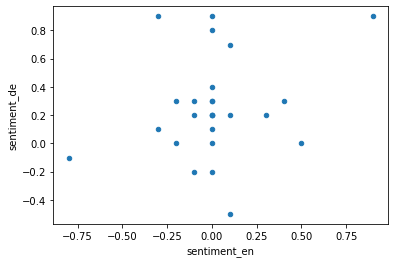

In [119]:

combined_df.plot(kind='scatter', x='sentiment_en', y='sentiment_de')
#plt.show()

#DE Article Sentiment vs English Sentiment

In [171]:
import numpy as np

def abs_diff(row):
    return np.ediff1d([row['sentiment_en'], row['sentiment_de']])[0]

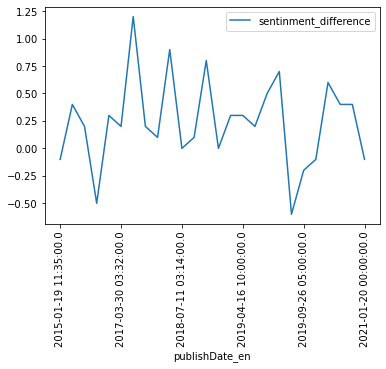

In [172]:
combined_df['sentinment_difference'] = combined_df.apply(abs_diff, axis=1)
combined_df.sort_values(by=['publishDate_en'], inplace=True)
combined_df.plot(kind='line', x='publishDate_en', y='sentinment_difference').tick_params(axis='x', rotation=90)


The verbiage and sentiment of the same articles in DE and EN are different due to cultural changes and impact.